## Logistic Regression; Decision Tree; SVC


Model: Logistic Regression

📊 Train Set:
                     precision    recall  f1-score   support

Insufficient_Weight       0.88      0.98      0.93       166
      Normal_Weight       0.89      0.69      0.78       165
     Obesity_Type_I       0.93      0.90      0.91       214
    Obesity_Type_II       0.95      0.98      0.97       178
   Obesity_Type_III       0.99      1.00      0.99       186
 Overweight_Level_I       0.76      0.82      0.79       178
Overweight_Level_II       0.80      0.80      0.80       179

           accuracy                           0.88      1266
          macro avg       0.88      0.88      0.88      1266
       weighted avg       0.89      0.88      0.88      1266

Accuracy: 0.8847

📊 Validation Set:
                     precision    recall  f1-score   support

Insufficient_Weight       0.81      0.98      0.89        49
      Normal_Weight       0.85      0.60      0.70        67
     Obesity_Type_I       0.91      0.84      0.87        61
   

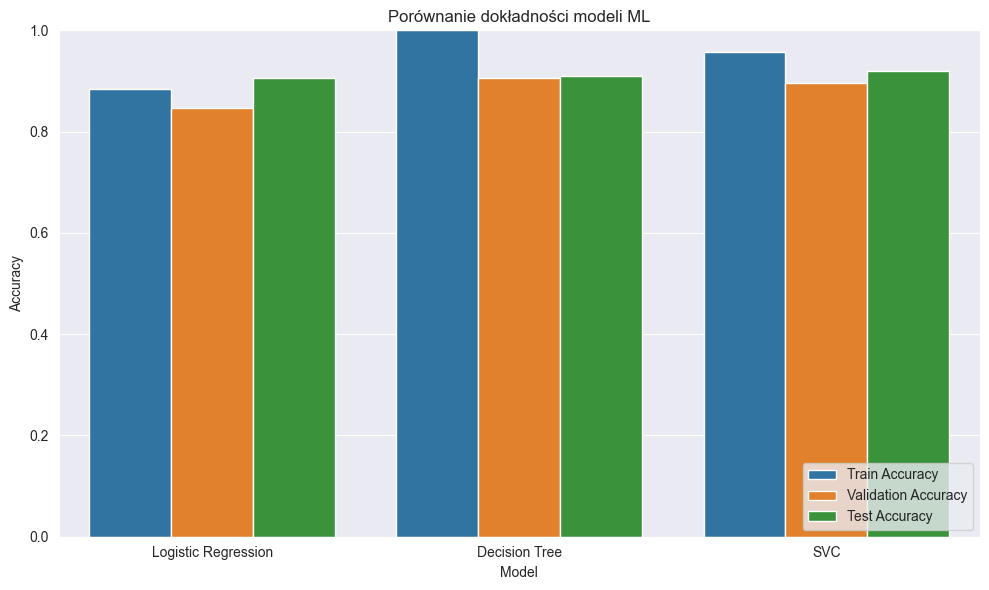

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Wczytaj dane
df = pd.read_csv("../data/ObesityDataSet.csv")

# Podział na cechy i etykiety
X = df.drop("NObeyesdad", axis=1)
y = df["NObeyesdad"]

# Podział na zbiory: treningowy (60%), walidacyjny (20%), testowy (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Wydzielenie kolumn wg typu danych
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Pipeline dla danych kategorycznych
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Pipeline dla danych numerycznych
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Połączenie pipeline'ów
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

# Lista modeli do przetestowania
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVC": SVC(probability=True)
}

# Słownik do przechowywania wyników
results = {
    'Model': [],
    'Train Accuracy': [],
    'Validation Accuracy': [],
    'Test Accuracy': []
}

# Trenowanie i ewaluacja modeli
for name, model in models.items():
    print(f"\nModel: {name}")
    pipeline = Pipeline(steps=[
        ('preprocessing', preprocessor),
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)

    accuracies = {}
    for split_name, X_split, y_split in [('Train', X_train, y_train), ('Validation', X_val, y_val), ('Test', X_test, y_test)]:
        y_pred = pipeline.predict(X_split)
        acc = accuracy_score(y_split, y_pred)
        accuracies[split_name] = acc

        print(f"\n📊 {split_name} Set:")
        print(classification_report(y_split, y_pred))
        print(f"Accuracy: {acc:.4f}")

    results['Model'].append(name)
    results['Train Accuracy'].append(accuracies['Train'])
    results['Validation Accuracy'].append(accuracies['Validation'])
    results['Test Accuracy'].append(accuracies['Test'])

# Tworzenie DataFrame z wynikami
results_df = pd.DataFrame(results)

# Wyświetlenie tabeli porównawczej
print("\n📈 Porównanie dokładności modeli:")
print(results_df)

# Wykres porównawczy dokładności
results_df_melted = results_df.melt(id_vars='Model', var_name='Dataset', value_name='Accuracy')

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df_melted, x='Model', y='Accuracy', hue='Dataset')
plt.title("Porównanie dokładności modeli ML")
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


## Przygotowanie danych

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

# Wczytanie danych
df = pd.read_csv('../data/ObesityDataSet.csv')

# --- Przygotowanie danych dla regresji liniowej ---
# One-hot encoding dla kolumn kategorycznych
X_reg = df.drop(columns=['Weight'])  # Target to 'Weight'
y_reg = df['Weight'].values.reshape(-1, 1)

# Przekształcenie kategorycznych na one-hot
X_reg_encoded = pd.get_dummies(X_reg)
X_reg_encoded = X_reg_encoded.astype(np.float64)

# Standaryzacja
scaler_reg = StandardScaler()
X_reg_scaled = scaler_reg.fit_transform(X_reg_encoded)

# Dodanie biasu
X_reg_scaled = np.hstack([np.ones((X_reg_scaled.shape[0], 1)), X_reg_scaled])

# Podział na zbiory
X_reg_train, X_reg_temp, y_reg_train, y_reg_temp = train_test_split(X_reg_scaled, y_reg, test_size=0.4, random_state=42)
X_reg_val, X_reg_test, y_reg_val, y_reg_test = train_test_split(X_reg_temp, y_reg_temp, test_size=0.5, random_state=42)

# --- Przygotowanie danych dla regresji logistycznej ---
X_clf = df.drop(columns=['NObeyesdad'])  # Target to 'NObeyesdad'
y_clf = df['NObeyesdad']

# One-hot encoding + standaryzacja
X_clf_encoded = pd.get_dummies(X_clf)
X_clf_encoded = X_clf_encoded.astype(np.float64)

scaler_clf = StandardScaler()
X_clf_scaled = scaler_clf.fit_transform(X_clf_encoded)
X_clf_scaled = np.hstack([np.ones((X_clf_scaled.shape[0], 1)), X_clf_scaled])

# Label encoding targetu
label_encoder = LabelEncoder()
y_clf_encoded = label_encoder.fit_transform(y_clf)

# Podział
X_clf_train, X_clf_temp, y_clf_train, y_clf_temp = train_test_split(X_clf_scaled, y_clf_encoded, test_size=0.4, random_state=42)
X_clf_val, X_clf_test, y_clf_val, y_clf_test = train_test_split(X_clf_temp, y_clf_temp, test_size=0.5, random_state=42)


## Zamknięta formuła

In [12]:
# Closed-form: theta = (X^T X)^(-1) X^T y
def closed_form_solution(X, y):
    return np.linalg.pinv(X.T @ X) @ X.T @ y

theta_closed = closed_form_solution(X_reg_train, y_reg_train)

# Predykcja i ewaluacja
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

y_train_pred = X_reg_train @ theta_closed
y_val_pred = X_reg_val @ theta_closed
y_test_pred = X_reg_test @ theta_closed

print("Zamknięta forma — MSE:")
print(f"Train: {mse(y_reg_train, y_train_pred):.4f}")
print(f"Val: {mse(y_reg_val, y_val_pred):.4f}")
print(f"Test: {mse(y_reg_test, y_test_pred):.4f}")


Zamknięta forma — MSE:
Train: 24.8839
Val: 24.9400
Test: 28.2665


## Regresja liniowa - gradient descent

In [13]:
def linear_gradient_descent(X, y, alpha=0.01, epochs=1000, batch_size=32):
    m, n = X.shape
    theta = np.zeros((n, 1))
    for epoch in range(epochs):
        indices = np.random.permutation(m)
        for i in range(0, m, batch_size):
            idx = indices[i:i+batch_size]
            X_batch, y_batch = X[idx], y[idx]
            y_pred = X_batch @ theta
            grad = (X_batch.T @ (y_pred - y_batch)) / batch_size
            theta -= alpha * grad
    return theta

theta_gd = linear_gradient_descent(X_reg_train, y_reg_train)

y_train_pred = X_reg_train @ theta_gd
y_val_pred = X_reg_val @ theta_gd
y_test_pred = X_reg_test @ theta_gd

print("Gradient Descent (Regresja) — MSE:")
print(f"Train: {mse(y_reg_train, y_train_pred):.4f}")
print(f"Val: {mse(y_reg_val, y_val_pred):.4f}")
print(f"Test: {mse(y_reg_test, y_test_pred):.4f}")


Gradient Descent (Regresja) — MSE:
Train: 24.8921
Val: 24.9257
Test: 28.3043


## Regresja logistyczna - gradient descent

In [14]:
def logistic_gradient_descent(X, y, alpha=0.01, epochs=1000, batch_size=32, num_classes=None):
    m, n = X.shape
    if num_classes is None:
        num_classes = len(np.unique(y))
    Y = np.eye(num_classes)[y]  # One-hot

    theta = np.zeros((n, num_classes))

    for epoch in range(epochs):
        indices = np.random.permutation(m)
        for i in range(0, m, batch_size):
            idx = indices[i:i+batch_size]
            X_batch = X[idx]
            Y_batch = Y[idx]
            logits = X_batch @ theta
            probs = np.exp(logits) / np.sum(np.exp(logits), axis=1, keepdims=True)
            grad = X_batch.T @ (probs - Y_batch) / batch_size
            theta -= alpha * grad
    return theta

def predict_multiclass(X, theta):
    logits = X @ theta
    return np.argmax(logits, axis=1)

theta_logistic = logistic_gradient_descent(X_clf_train, y_clf_train)

y_train_pred = predict_multiclass(X_clf_train, theta_logistic)
y_val_pred = predict_multiclass(X_clf_val, theta_logistic)
y_test_pred = predict_multiclass(X_clf_test, theta_logistic)

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

print("Gradient Descent (Logistyczna) — Accuracy:")
print(f"Train: {accuracy(y_clf_train, y_train_pred):.4f}")
print(f"Val: {accuracy(y_clf_val, y_val_pred):.4f}")
print(f"Test: {accuracy(y_clf_test, y_test_pred):.4f}")


Gradient Descent (Logistyczna) — Accuracy:
Train: 0.8460
Val: 0.8128
Test: 0.8463


## Scikit-learn

In [15]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score

# --- Linear Regression ---
lr = LinearRegression()
lr.fit(X_reg_train, y_reg_train)

print("SKLEARN Regresja liniowa — MSE:")
print(f"Train: {mean_squared_error(y_reg_train, lr.predict(X_reg_train)):.4f}")
print(f"Val: {mean_squared_error(y_reg_val, lr.predict(X_reg_val)):.4f}")
print(f"Test: {mean_squared_error(y_reg_test, lr.predict(X_reg_test)):.4f}")

# --- Logistic Regression ---
clf = LogisticRegression(max_iter=1000)
clf.fit(X_clf_train, y_clf_train)

print("SKLEARN Regresja logistyczna — Accuracy:")
print(f"Train: {accuracy_score(y_clf_train, clf.predict(X_clf_train)):.4f}")
print(f"Val: {accuracy_score(y_clf_val, clf.predict(X_clf_val)):.4f}")
print(f"Test: {accuracy_score(y_clf_test, clf.predict(X_clf_test)):.4f}")


SKLEARN Regresja liniowa — MSE:
Train: 24.8839
Val: 24.9400
Test: 28.2665
SKLEARN Regresja logistyczna — Accuracy:
Train: 0.8839
Val: 0.8365
Test: 0.8936


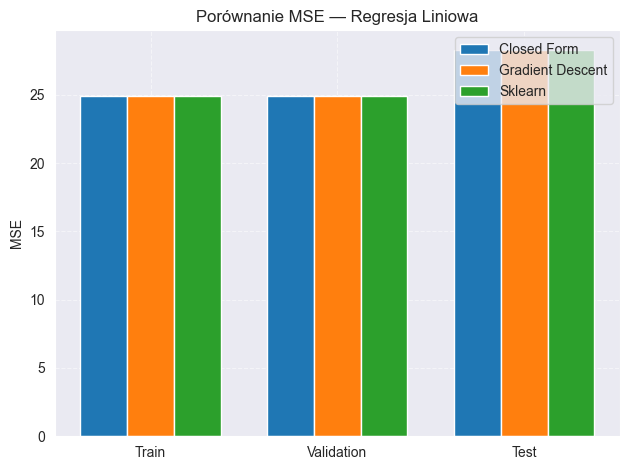

In [16]:
import matplotlib.pyplot as plt

# Zbierz dane
mse_results = {
    "Closed Form": [
        mse(y_reg_train, X_reg_train @ theta_closed),
        mse(y_reg_val, X_reg_val @ theta_closed),
        mse(y_reg_test, X_reg_test @ theta_closed),
    ],
    "Gradient Descent": [
        mse(y_reg_train, X_reg_train @ theta_gd),
        mse(y_reg_val, X_reg_val @ theta_gd),
        mse(y_reg_test, X_reg_test @ theta_gd),
    ],
    "sklearn": [
        mean_squared_error(y_reg_train, lr.predict(X_reg_train)),
        mean_squared_error(y_reg_val, lr.predict(X_reg_val)),
        mean_squared_error(y_reg_test, lr.predict(X_reg_test)),
    ]
}

labels = ['Train', 'Validation', 'Test']
x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
ax.bar(x - width, mse_results["Closed Form"], width, label='Closed Form')
ax.bar(x, mse_results["Gradient Descent"], width, label='Gradient Descent')
ax.bar(x + width, mse_results["sklearn"], width, label='Sklearn')

ax.set_ylabel('MSE')
ax.set_title('Porównanie MSE — Regresja Liniowa')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


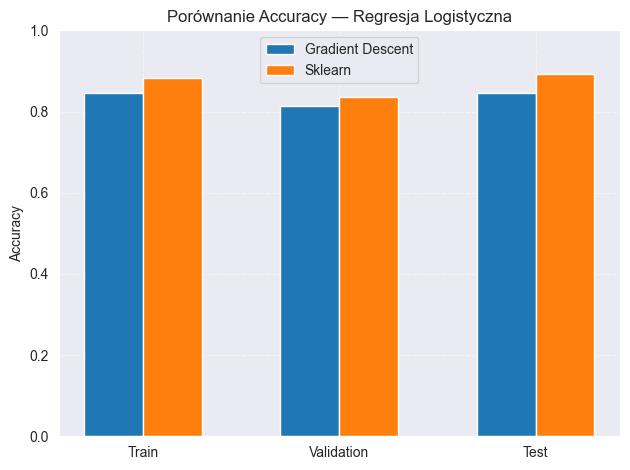

In [17]:
# Zbierz dane
acc_results = {
    "Gradient Descent": [
        accuracy(y_clf_train, predict_multiclass(X_clf_train, theta_logistic)),
        accuracy(y_clf_val, predict_multiclass(X_clf_val, theta_logistic)),
        accuracy(y_clf_test, predict_multiclass(X_clf_test, theta_logistic)),
    ],
    "sklearn": [
        accuracy_score(y_clf_train, clf.predict(X_clf_train)),
        accuracy_score(y_clf_val, clf.predict(X_clf_val)),
        accuracy_score(y_clf_test, clf.predict(X_clf_test)),
    ]
}

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots()
ax.bar(x - width/2, acc_results["Gradient Descent"], width, label='Gradient Descent')
ax.bar(x + width/2, acc_results["sklearn"], width, label='Sklearn')

ax.set_ylabel('Accuracy')
ax.set_title('Porównanie Accuracy — Regresja Logistyczna')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1.0)
ax.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## PyTorch

>>> Trening na CPU
Epoch 1/10, Train Loss: 36.6175, Val Loss: 1.5415, Val Acc: 0.49
Epoch 2/10, Train Loss: 27.9035, Val Loss: 1.2846, Val Acc: 0.56
Epoch 3/10, Train Loss: 24.2513, Val Loss: 1.1640, Val Acc: 0.60
Epoch 4/10, Train Loss: 22.4888, Val Loss: 1.0966, Val Acc: 0.61
Epoch 5/10, Train Loss: 21.3854, Val Loss: 1.0487, Val Acc: 0.64
Epoch 6/10, Train Loss: 20.5089, Val Loss: 1.0120, Val Acc: 0.63
Epoch 7/10, Train Loss: 19.8334, Val Loss: 0.9847, Val Acc: 0.64
Epoch 8/10, Train Loss: 19.3376, Val Loss: 0.9606, Val Acc: 0.66
Epoch 9/10, Train Loss: 18.9350, Val Loss: 0.9448, Val Acc: 0.66
Epoch 10/10, Train Loss: 18.4801, Val Loss: 0.9218, Val Acc: 0.69

!!! GPU niedostępne, pomijam trening na GPU.

=== PORÓWNANIE ===
CPU - Czas treningu: 0.35s, Dokładność testowa: 0.6619
GPU - brak wyników (niedostępne)


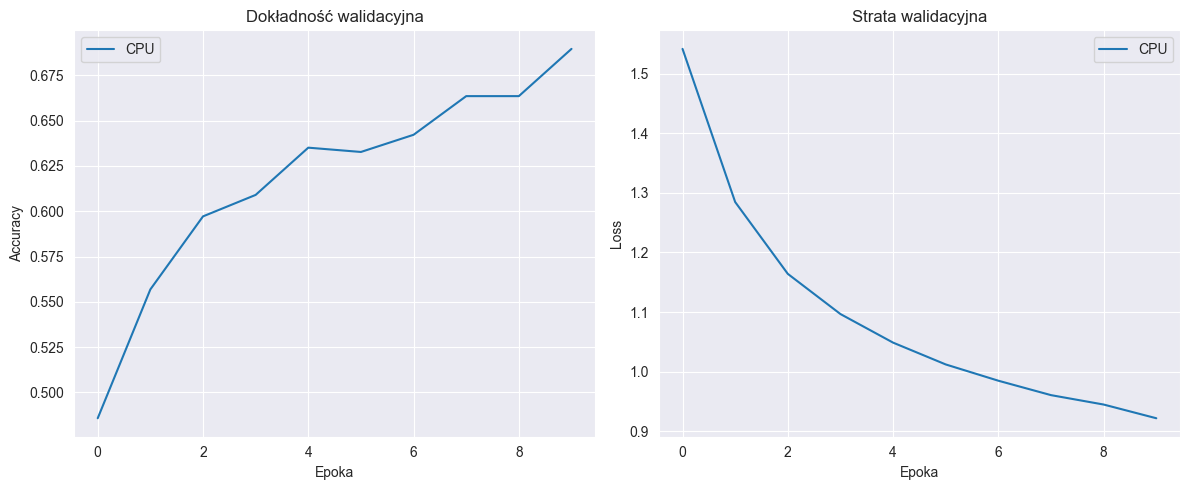

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
# Wczytanie danych
df = pd.read_csv("../data/ObesityDataSet.csv")

# Label Encoding dla wartości kategorycznych
categorical_cols = df.select_dtypes(include=['object']).columns
encoders = {}
for col in categorical_cols:
    enc = LabelEncoder()
    df[col] = enc.fit_transform(df[col])
    encoders[col] = enc

# Podział na cechy i target
X = df.drop("NObeyesdad", axis=1).values
y = df["NObeyesdad"].values

# Normalizacja cech
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Konwersja do tensora
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)
# Podział: 60% train, 20% val, 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=42)

# Datasets & Dataloaders
BATCH_SIZE = 64
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        return self.linear(x)
def train_model(model, train_loader, val_loader, device, epochs=10):
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    history = {"train_loss": [], "val_loss": [], "val_acc": []}
    start = time.time()

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            outputs = model(xb)
            loss = criterion(outputs, yb)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        val_loss, val_acc = evaluate_model(model, val_loader, device)
        history["train_loss"].append(running_loss / len(train_loader))
        history["val_loss"].append(val_loss)
        history["val_acc"].append(val_acc)
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {running_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}")

    end = time.time()
    total_time = end - start
    return history, total_time

def evaluate_model(model, loader, device):
    model.eval()
    correct, total, loss_total = 0, 0, 0.0
    criterion = nn.CrossEntropyLoss()
    with torch.no_grad():
        for xb, yb in loader:
            xb, yb = xb.to(device), yb.to(device)
            outputs = model(xb)
            loss = criterion(outputs, yb)
            loss_total += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += yb.size(0)
            correct += (predicted == yb).sum().item()
    return loss_total / len(loader), correct / total
input_dim = X.shape[1]
num_classes = len(torch.unique(y))

# Przygotowanie urządzeń
cpu_device = torch.device("cpu")

# Trening na CPU
print(">>> Trening na CPU")
model_cpu = LogisticRegressionModel(input_dim, num_classes)
cpu_history, cpu_time = train_model(model_cpu, train_loader, val_loader, cpu_device)
test_loss_cpu, test_acc_cpu = evaluate_model(model_cpu, test_loader, cpu_device)

# Sprawdzenie dostępności GPU
if torch.cuda.is_available():
    print("\n>>> Trening na GPU")
    gpu_device = torch.device("cuda")
    model_gpu = LogisticRegressionModel(input_dim, num_classes)
    gpu_history, gpu_time = train_model(model_gpu, train_loader, val_loader, gpu_device)
    test_loss_gpu, test_acc_gpu = evaluate_model(model_gpu, test_loader, gpu_device)
else:
    print("\n!!! GPU niedostępne, pomijam trening na GPU.")
    gpu_history, gpu_time = None, None
    test_loss_gpu, test_acc_gpu = None, None

# Porównanie
print("\n=== PORÓWNANIE ===")
print(f"CPU - Czas treningu: {cpu_time:.2f}s, Dokładność testowa: {test_acc_cpu:.4f}")

if torch.cuda.is_available():
    print(f"GPU - Czas treningu: {gpu_time:.2f}s, Dokładność testowa: {test_acc_gpu:.4f}")
else:
    print("GPU - brak wyników (niedostępne)")

# Wykresy (tylko jeśli GPU trenowane)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(cpu_history["val_acc"], label="CPU")
if gpu_history is not None:
    plt.plot(gpu_history["val_acc"], label="GPU")
plt.title("Dokładność walidacyjna")
plt.xlabel("Epoka")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(cpu_history["val_loss"], label="CPU")
if gpu_history is not None:
    plt.plot(gpu_history["val_loss"], label="GPU")
plt.title("Strata walidacyjna")
plt.xlabel("Epoka")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()
